# GRIDSEARCHCV WITH PIPELINE AND ROC/AUC

In [2]:
import pandas as pd
df = pd.read_csv('wisc_bc_data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,87139402,B,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,8910251,B,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,905520,B,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,868871,B,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,9012568,B,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766


In [3]:
df.shape

(569, 32)

In [5]:
df.isnull().sum()

id                   0
diagnosis            0
radius_mean          0
texture_mean         0
perimeter_mean       0
area_mean            0
smoothness_mean      0
compactness_mean     0
concavity_mean       0
points_mean          0
symmetry_mean        0
dimension_mean       0
radius_se            0
texture_se           0
perimeter_se         0
area_se              0
smoothness_se        0
compactness_se       0
concavity_se         0
points_se            0
symmetry_se          0
dimension_se         0
radius_worst         0
texture_worst        0
perimeter_worst      0
area_worst           0
smoothness_worst     0
compactness_worst    0
concavity_worst      0
points_worst         0
symmetry_worst       0
dimension_worst      0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 569 non-null    int64  
 1   diagnosis          569 non-null    object 
 2   radius_mean        569 non-null    float64
 3   texture_mean       569 non-null    float64
 4   perimeter_mean     569 non-null    float64
 5   area_mean          569 non-null    float64
 6   smoothness_mean    569 non-null    float64
 7   compactness_mean   569 non-null    float64
 8   concavity_mean     569 non-null    float64
 9   points_mean        569 non-null    float64
 10  symmetry_mean      569 non-null    float64
 11  dimension_mean     569 non-null    float64
 12  radius_se          569 non-null    float64
 13  texture_se         569 non-null    float64
 14  perimeter_se       569 non-null    float64
 15  area_se            569 non-null    float64
 16  smoothness_se      569 non

### CREATE THE PARAMETERS

In [9]:
x = df.iloc[:,2:].values
y = df.iloc[:,1].values

In [11]:
# Transforming y to 0 and 1

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(y)

le.transform(['M','B'])

array([1, 0])

In [14]:
# save 20% of your dataset for final testing
# use 80% for training and validation process

# STEPS:
 #1. first divide our dataset into 80(training):20(test)
 #2. next divide the 80 part to training and validation

#80: 20
x_train1, x_test1, y_train1, y_test1 = train_test_split(x,y,test_size=0.2, random_state = 1)

#75:25
x_train2, x_val, y_train2, y_val = train_test_split(x_train1,y_train1,test_size=0.25, random_state = 1)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [18]:
print(f"Total dataset {len(x)}")
print(f"Total test data saved for future use: {len(x_test1)}")
print(f"Total training data: {len(x_train2)}")
print(f"Total validation data: {len(x_val)}")

Total dataset 569
Total test data saved for future use: 114
Total training data: 341
Total validation data: 114


### IMPLEMENT PIPELINE

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

pipe_lr = Pipeline([('scl', StandardScaler()), ('pca', PCA(n_components=2)), ('lr', LogisticRegression())])
pipe_lr.fit(x_train2,y_train2)
print(f'Test Accuracy: {pipe_lr.score(x_test1,y_test1)}')

Test Accuracy: 0.9473684210526315


In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

pipe_svc = Pipeline([('scl', StandardScaler()), ('pca', PCA(n_components=2)), ('svc', SVC())])
pipe_svc.fit(x_train2, y_train2)
print(f'Test Accuracy: {pipe_svc.score(x_test1, y_test1)}')

Test Accuracy: 0.9649122807017544


## GRID SEARCH

In [32]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

pipe_svc = Pipeline([('scl', StandardScaler()), ('pca', PCA()), ('svc', SVC())])
     
param_grid = {'pca__n_components':[14,15],'svc__C':[0.001,0.01,0.1,1,10,100],'svc__gamma': [0.001, 0.01, 0.1,1,10], 'svc__kernel':['rbf','poly']}
                    
                    
grid = GridSearchCV(pipe_svc, param_grid = param_grid, cv=5)

grid.fit(x_train2,y_train2)
                    
print(f" Best cross-validation accuracy: {grid.best_score_}")
print(f" Best parameters: {grid.best_params_}")
print(f" Validation set accuracy: {round(grid.score(x_val, y_val),2)}")

 Best cross-validation accuracy: 0.9823529411764707
 Best parameters: {'pca__n_components': 14, 'svc__C': 10, 'svc__gamma': 0.01, 'svc__kernel': 'rbf'}
 Validation set accuracy: 0.96


In [33]:
pipe_lr = Pipeline([('scl', StandardScaler()), ('pca', PCA(n_components=14)), ('svc', SVC(C =10, gamma=0.01, kernel='rbf',probability=True))])
pipe_lr.fit(x_train2,y_train2)
print(f'Test Accuracy: {pipe_lr.score(x_test1,y_test1)}')

Test Accuracy: 0.956140350877193


In [34]:
# predict the model
y_pred2 = pipe_lr.predict(x_test1)


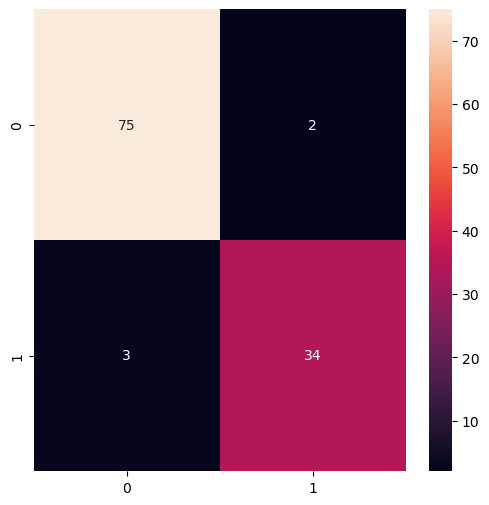

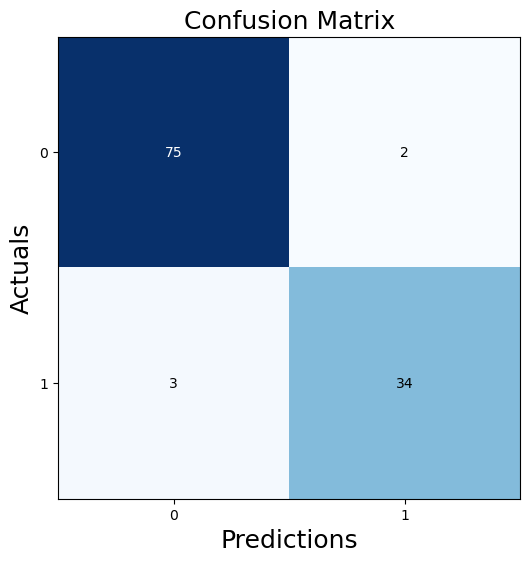

In [35]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test1, y_pred2)

plt.figure(figsize=(6,6))
import seaborn as sns
sns.heatmap(cm, annot=True)

fig, ax = plot_confusion_matrix(conf_mat=cm, figsize=(6,6))
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()
                    

## CLASSIFICATION REPORT

In [38]:
from sklearn.metrics import classification_report
print(classification_report(y_test1, y_pred2))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97        77
           1       0.94      0.92      0.93        37

    accuracy                           0.96       114
   macro avg       0.95      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



### AUC ROC CURVE

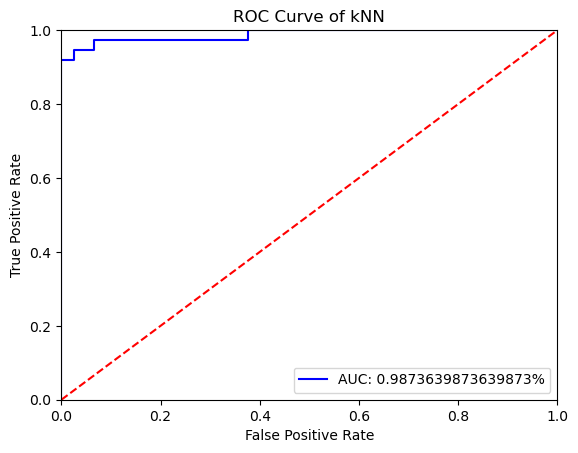

In [40]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt

y_scores = pipe_lr.predict_proba(x_test1)
fpr, tpr, threshold = roc_curve(y_test1, y_scores[:,1])
roc_auc = auc(fpr,tpr)

plt.plot(fpr, tpr, 'b', label=f"AUC: {roc_auc}%" )
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of kNN')
plt.show()

# TRY DIFF DATASET

In [41]:
data = pd.read_csv("diabetes.csv")

In [42]:
data.head()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Set parameters

In [44]:
x = data.drop('class',axis=1)
y = data['class']

### Split the data to train and test

In [49]:
x3_train, x3_test, y3_train, y3_test = train_test_split(x,y,test_size=0.2, random_state=1)

x4_train, x4_test, y4_train, y4_test = train_test_split(x,y,test_size=0.25, random_state=1)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Implement Pipeline (logistic Regression vs SVC model)

In [47]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

pipe_lr = Pipeline([('scl', StandardScaler()), ('pca', PCA(n_components=2)), ('lr', LogisticRegression())])
pipe_lr.fit(x3_train,y3_train)
print(f'Test Accuracy: {pipe_lr.score(x3_test,y3_test)}')

Test Accuracy: 0.7467532467532467


In [48]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

pipe_svc = Pipeline([('scl', StandardScaler()), ('pca', PCA(n_components=2)), ('svc', SVC())])
pipe_svc.fit(x3_train, y3_train)
print(f'Test Accuracy: {pipe_svc.score(x3_test, y3_test)}')

Test Accuracy: 0.7402597402597403


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

pipe_svc = Pipeline([('scl', StandardScaler()), ('pca', PCA()), ('svc', SVC())])
     
param_grid = {'pca__n_components':[0,8],'svc__C':[0.001,0.01,0.1,1,10,100],'svc__gamma': [0.001, 0.01, 0.1,1,10], 'svc__kernel':['rbf','poly']}
                    
                    
grid = GridSearchCV(pipe_svc, param_grid = param_grid, cv=5)

grid.fit(x4_train,y4_train)
                    
print(f" Best cross-validation accuracy: {grid.best_score_}")
print(f" Best parameters: {grid.best_params_}")
print(f" Validation set accuracy: {round(grid.score(x4_test, y4_test),2)}")